In [1]:
!pip install nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.1.18-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (748 kB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# dataset = pd.read_csv("../entry_dataset.csv", sep=";", index_col=0, parse_dates=["date"])
dataset = pd.read_csv("gs://tfm_aideas_wb/entry_dataset.csv", sep=";", index_col=0, parse_dates=["date"])

In [4]:
query = dataset.copy()
positive_mask = query.r_adj > query.r_adj.quantile(0.8)
negative_mask = query.r_adj < query.r_adj.quantile(0.2)
positive_news = query.loc[positive_mask]
negative_news = query.loc[negative_mask]
positive_news["positive"] = True
negative_news["positive"] = False

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
pos_neg_news = pd.concat([positive_news, negative_news], axis=0)

In [6]:
del dataset
del positive_news
del negative_news

In [7]:
pos_neg_news.positive.value_counts()

False    10666
True     10646
Name: positive, dtype: int64

# Bag of words - Con stopwords

In [8]:
token = RegexpTokenizer(r'[a-zA-ZÀ-ÿ0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = token.tokenize)

In [9]:
text_counts= cv.fit_transform(pos_neg_news["body"])

In [10]:
text_counts = text_counts.astype('float32')

No se ha hecho svd_solver='full' en el PCA porque tarda muchísimo y no acaba

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(text_counts.todense())

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


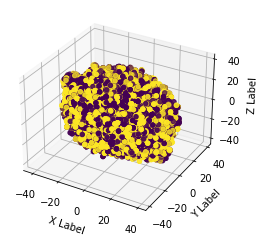

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=pos_neg_news["positive"])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

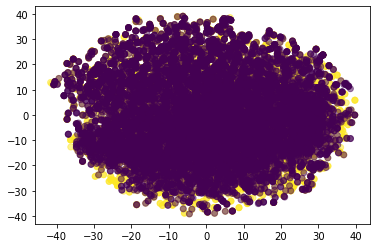

In [13]:
plt.scatter(weights[:,0], weights[:,1], c=pos_neg_news["positive"], alpha=0.5)

# Bag of words - Sin stopwords

In [14]:
token = RegexpTokenizer(r'[a-zA-ZÀ-ÿ0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = token.tokenize, stop_words=spanish_stopwords)

In [15]:
text_counts= cv.fit_transform(pos_neg_news["body"])

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(text_counts.todense())

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


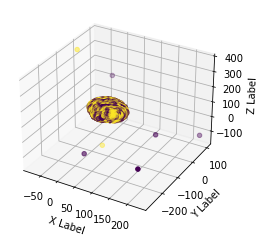

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=pos_neg_news["positive"])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

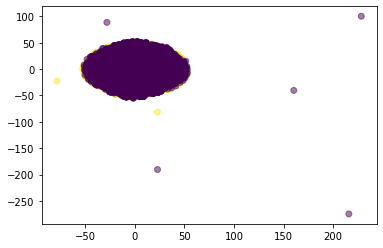

In [18]:
plt.scatter(weights[:,0], weights[:,1], c=pos_neg_news["positive"], alpha=0.5)

# Bag of words - Sin stopwords y normalizado

In [19]:
from sklearn.preprocessing import StandardScaler

enc = StandardScaler()

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(enc.fit_transform(text_counts.todense()))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


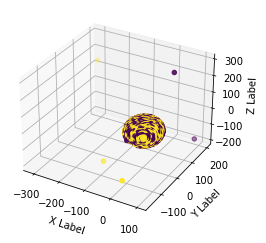

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=pos_neg_news["positive"])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

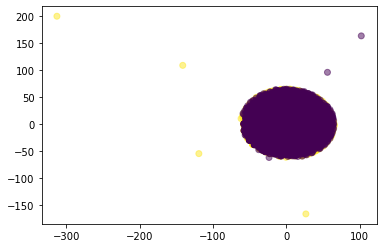

In [22]:
plt.scatter(weights[:,0], weights[:,1], c=pos_neg_news["positive"], alpha=0.5)

# Bag of words - Sin stopwords y sólo alfanuméricos

In [23]:
# sin stopwords y sólo alfanuméricos 
pos_neg_news['clean_body'] = pos_neg_news['body'].apply(
    lambda x: ' '.join(
        [word.lower() for word in x.split() 
        if word not in (spanish_stopwords) and word.isalnum()]
        )
    )

cv2 = CountVectorizer(lowercase=True, ngram_range = (1,1),)
text_counts= cv2.fit_transform(pos_neg_news["clean_body"])

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(text_counts.todense())

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


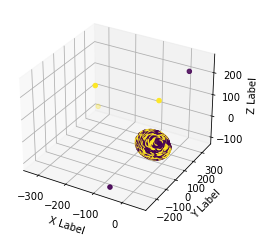

In [25]:
# sin stopwords con tokenizado custom
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=pos_neg_news["positive"])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

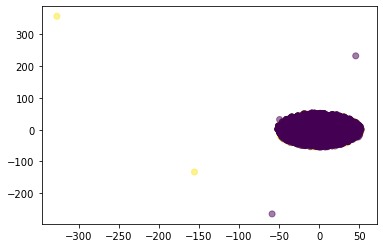

In [26]:
plt.scatter(weights[:,0], weights[:,1], c=pos_neg_news["positive"], alpha=0.5)

# TF-IDF

In [27]:
pos_neg_news['clean_body'] = pos_neg_news['body'].apply(
    lambda x: ' '.join(
        [word.lower() for word in x.split() 
        if word not in (spanish_stopwords) and word.isalnum()]
        )
    )

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(pos_neg_news["clean_body"])

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(text_counts.todense())

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


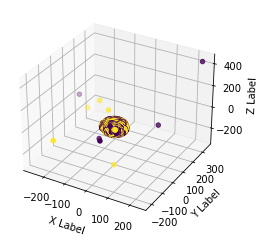

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=pos_neg_news["positive"])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

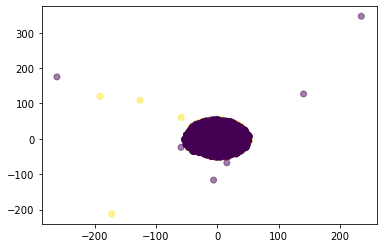

In [31]:
plt.scatter(weights[:,0], weights[:,1], c=pos_neg_news["positive"], alpha=0.5)